# Projeto 2 -  Udacity
## Programa Nanodegree Fundamentos de Data Science II

### Marlesson R. O. de Santana

# Análise de Sobreviventes do Titanic

O naufrágio do RMS Titanic é um dos naufrágios mais famosos da história. Em 15 de abril de 1912, durante sua viagem inaugural, o Titanic afundou depois de colidir com um iceberg, matando 1502 de 2224 passageiros e tripulantes. 

Uma das razões pelas quais o naufrágio levou a uma grande perda de vidas era que não havia botes salva-vidas suficientes para os passageiros e tripulantes. Embora houvesse algum elemento de sorte envolvido na sobrevivência do naufrágio, alguns grupos de pessoas eram mais propensos a sobreviver do que outros, como mulheres, crianças e a classe alta. Vamos analisar o quanto esses fatores propiciaram para a sobrevivência do passageiro.


In [1]:
### Necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
import warnings

### Seaborn style
sns.set_style("whitegrid")

### Params
#sns.mpl.rc("figure", figsize=(15,4))
#plt.rcParams['figure.figsize']=(10,10)

%matplotlib inline  
plt.rcParams['figure.figsize']=(10,5)
warnings.filterwarnings(action='ignore')

In [2]:
### Let's import our data
df = pd.read_csv('titanic.csv',index_col='PassengerId')

### Transform
df['Survived?'] = df['Survived']
df['Survived'] = df['Survived'].map({0: 'Não Sobreviveu', 1: 'Sobreviveu'})
df['Sex']      = df['Sex'].map({'male': 'Homem', 'female': 'Mulher'})
df['Class']    = df['Pclass'].map({1: '1º Classe', 2: '2º Classe', 3: '3º Classe'})

## Filter
df = df[['Class', 'Pclass', 'Sex', 'Age', 'Survived', 'Survived?']]

### and test if everything OK
#df.head()

### Independente de classe, sexo e idade, analisando apenas o total de ocorrências, é possível observar que mais pessoas **não** sobreviveram ao acidente.

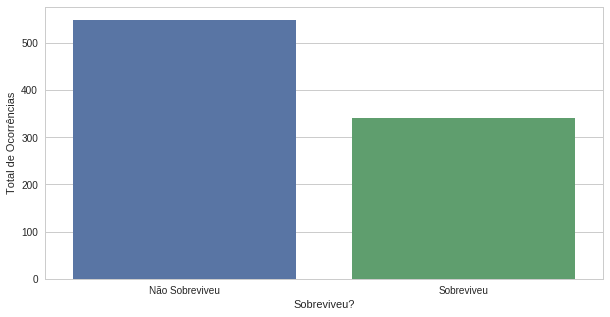

In [3]:
### Target variable exploration

sns.countplot(df.Survived);
plt.xlabel('Sobreviveu?');
plt.ylabel('Total de Ocorrências');
plt.show()

É possível observar que a maioria das pessoas **não sobreviveram** ao desastre. De um total de 891 pessoas, cerca de **62%** das pessoas vieram a falecer 

## Se agruparmos as ocorrências por sexo, fica evidente que preferência no resgate foram das mulheres

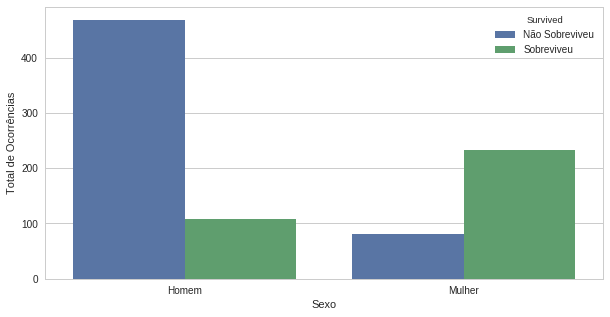

In [4]:
g = sns.countplot(x="Sex", hue="Survived", data=df)
plt.xlabel('Sexo');
plt.ylabel('Total de Ocorrências');
plt.show()

É evidente que houve preferência no resgate das mulheres, sendo que **71%** das mulheres sobreviveram ao desastre do Titanic (dados oficiais). 

### Utilizando a distribuição de sobrevivêntes por idade, é possível observar que as crianças tiveram preferência no resgate, e que o maior indice de fatalidade ocorreu entre pessoas de 20 a 30 anos

Observando a distribuição das idades de todos os passageiros abaixo, temos que a média de idade dos passageiros é de *30 anos*, sendo que, a maioria dos passageiros tem idade entre 20 a 40 anos

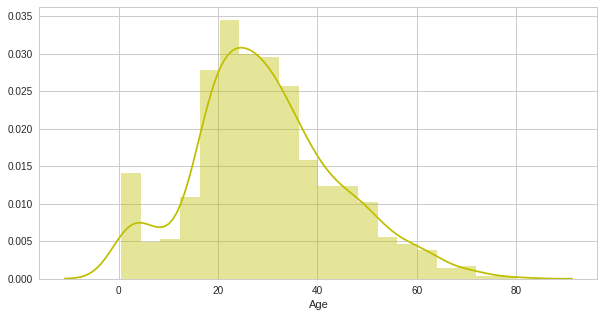

In [5]:
sns.distplot(df.Age.dropna(), hist=True, color="y")

Com relação a sobrevivênia por idade, é possível observar **alguns pontos** importantes entre as pessoas que **não** sobreviveram e as que sobreviveram.
* Houve um maior indice de sobreviventes para as crianças de até 5 anos de idade
* Entre as pessoas entre 15 e 30 anos, o indice de **não sobrevivência** foi maior
* A partir de 30 anos a distribuição permanece semelhante.

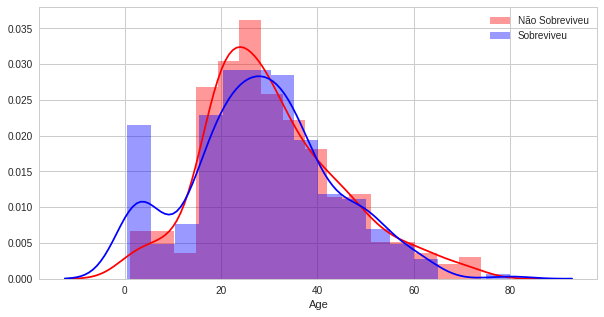

In [6]:
### Distribution per Survived / Not Survived Value
sns.distplot(df.loc[df.Survived=='Não Sobreviveu', 'Age'].dropna(), color='red', label='Não Sobreviveu');
sns.distplot(df.loc[df.Survived=='Sobreviveu', 'Age'].dropna(), color='blue', label='Sobreviveu');
plt.legend(loc='best')

Embora **não** exista nenhuma regra naval relacionada a preferência no resgate de mulheres e crianças, observamos que para o naufrágio do Titanic houve de fato essa preferência. 

Embora, segundo [1],  na prática isso de fato não acontece. Um estudo de 2012 levantou dados sobre 16 naufrágios entre 1852 e 2011, envolvendo cerca de 150 mil pessoas (o Titanic foi deliberadamente excluído). Ele apontou que, do total de vítimas, 37,4% dos homens escaparam, mas apenas 26,7% das mulheres e 15,3% das crianças

[1] https://mundoestranho.abril.com.br/ambiente/em-naufragios-criancas-e-mulheres-tem-mesmo-prioridade/


### Um outro fator que poderia ter sido decisivo na sobrevivência é a classe social da pessoa. Será que o valor do Ticket de embarque propiciou a sobrevivência? 

O tickets de embarque foram vendidos para três classes direferentes, 1º classe, a mais cara e destinada apenas aos ricos e pessoas importantes, 2º classe e a 3º classe.

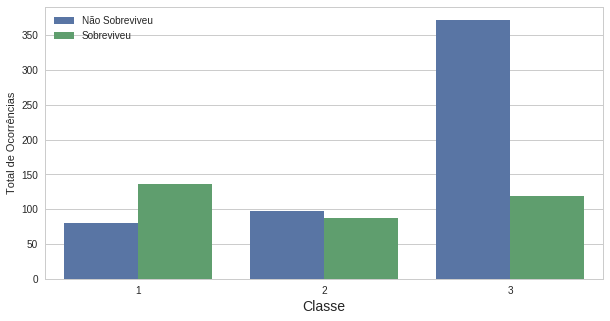

In [7]:
sns.countplot(x='Pclass', hue="Survived", data=df);
plt.xlabel('Classe', fontsize=14);
plt.ylabel('Total de Ocorrências');
plt.legend(loc=0);

É possível observar que **a classe influênciou bastante na sobrevivência**. Para a 1º classe, em que o valor do ticket é maior, houveram mais registros de sobrevivênia do que de fatalidades. Já na a 3º classe, onde se encontravam as pessoas mais pobres, a taxa de **não sobrevivência** é 2 vezes maior que a de sobrevivência.

É possível concluir que o valor do Ticket de embarque teve grande influência nas chances de sobrevivência do desastre

#### Com relação as chances de sobrevivência, se observarmos o gênero e a classe social é possível concluir que, independênte da classe, ser mulher é um fator decisivo para a sobrevivência

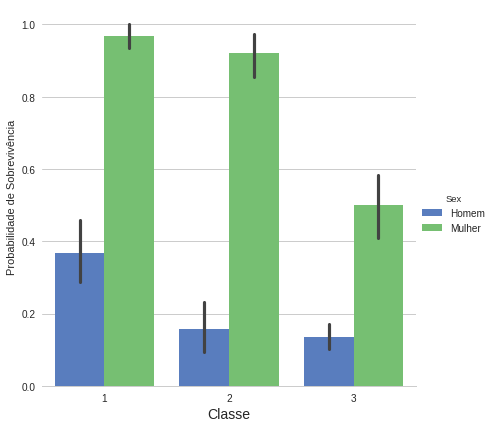

In [8]:
# Draw a nested barplot to show survival for class and sex
g = sns.factorplot(x="Pclass", y="Survived?", hue="Sex", data=df,
                   size=6, kind="bar", palette="muted")
g.despine(left=True)
plt.xlabel('Classe', fontsize=14);
g.set_ylabels("Probabilidade de Sobrevivência")


A **probabilidade de sobrevivência decresce com relação a classe**, tanto para homens quanto para mulheres. Mas, ser mulher ainda garante uma vantagem na sobrevivênia do desastre com o Titanic. **Mesmo uma mulher na 3º classe tem mais chances de sobrevivência que um homem na 1º classe.**

### Conclusão

Embora houvesse algum elemento de sorte envolvido na sobrevivência do naufrágio, foi possível analisar que alguns grupos de pessoas eram mais propensos a sobreviver do que outros. **A classe social, gênero e idade foram fatores decisivos para a sobrevivência do indivíduo**.

Mulheres e crianças tiveram prioridade no resgate, apresentando maiores taxas de sobrevivência. Com relação a classe social, os Tickets de primeira classe garantiram maior probabilidade na sobrevivência do indivíduo em relação as classes mais pobres.
